# Worksheet 02b: Nesting, List Columns, and `purrr`
_**Leader:** Diana Lin **Reviewer:** Iciar Fernandez **ASDA Assist:** David Kepplinger_

_Version 1.0_

_Attributions_: Major thanks to Firas Moosvi, as some of these questions were taken from his assignment from previous years, and the STAT547 2018-2019 Guidebook, as well as Vincenzo Coia for his ideas and input.

This is the corresponding worksheet for Lecture 03b (November 3, 2020) & Lecture 04b (November 5, 2020) of STAT545B.

To achieve full marks for worksheets, you will have to answer 40% of the autograded questions. For this particular worksheet, you will have to answer **6** out of the **14** autograded questions (Q15 & Q16 are not autograded). Some questions rely on answers from previous questions in order to be completed. 

Here are the groupings:

- **Group 1**: 1, 2
- **Group 2**: 3, 4, 5*
- **Group 3**: 10, 11, 12
- **Group 4**: 13, 14
- **Individuals**: 6, 7, 8, 9

\*The questions in Group 2 can actually be answered individually, but are ideally completed as a group as they build on each other conceptually.

Here you can install any packages you may need. Most likely you will need to install `devtools`, to order to install the very last package `distplyr`.

In [2]:
# install packages, e.g.
# install.packages('testthat')
# install.packages('digest')
# install.packages('tidyverse')
# install.packages('palmerpenguins')
# install.packages('glue')
# install.packages('gapminder')
# install.packages('broom')
# install.packages('devtools')
 devtools::install_github('vincenzocoia/distplyr')

rlang  (0.4.7  -> 0.4.8 ) [CRAN]
glue   (1.4.1  -> 1.4.2 ) [CRAN]
digest (0.6.25 -> 0.6.27) [CRAN]
vctrs  (0.3.2  -> 0.3.4 ) [CRAN]
evd    (NA     -> 2.3-3 ) [CRAN]


Installing 5 packages: rlang, glue, digest, vctrs, evd

Installing packages into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpy3A5Sz/remotes1f326f95cf/vincenzocoia-distplyr-05a968e/DESCRIPTION’
─  preparing ‘distplyr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘distplyr_0.1.1.tar.gz’
   


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



Here you can load any packages you may need:

In [ ]:
# load packages, e.g.
# library(devtools)

Here are the packages _we need_ for this worksheet:

In [24]:
library(testthat)
library(digest)
library(tidyverse)
library(palmerpenguins)
library(glue)
library(gapminder)
library(broom)
library(distplyr)

## Nesting and List Columns

_One_ of the ways a list-column can be made is by using `nest()`.

**QUESTION 1**: Create a tibble that bundles everything in `gapminder` except for `country` and `continent` into a list-column. Name your list column `other` (without using `rename()` or `mutate()`). Store your answer in `answer1`.

```r

(answer1 <- gapminder %>%
   nest(FILL_THIS_IN = FILL_THIS_IN))
```

In [5]:
(answer1 <- gapminder %>%
   nest(other = where(is.numeric)))

country,continent,other
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"
Austria,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 66.800, 67.480, 69.540, 70.140, 70.630, 72.170, 73.180, 74.940, 76.040, 77.510, 78.980, 79.829, 6927772.000, 6965860.000, 7129864.000, 7376998.000, 7544201.000, 7568430.000, 7574613.000, 7578903.000, 7914969.000, 8069876.000, 8148312.000, 8199783.000, 6137.076, 8842.598, 10750.721, 12834.602, 16661.626, 19749.422, 21597.084, 23687.826, 27042.019, 29095.921, 32417.608, 36126.493"
Bahrain,Asia,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 50.939, 53.832, 56.

In [6]:
test_that('Question 1', {
    expect_known_hash(enc2utf8(sapply(answer1$other, colnames)), 'ceba7fd58def34a537b5b13430a7ec2a')
    expect_known_hash(sapply(answer1$other, dim), '388a8eae98b3cb184d3fe8ed8dd46916')
    expect_known_hash(sapply(answer1$other, `[[`, 'year'), '0370844f5c0d097891d284949811883e')
})
cat('Success!')

Success!

Why would we use list-columns? Here is a use case.

**QUESTION 2**: _Reproducibly_ randomly sample 5 countries in the `gapminder` tibble. Store your answer in `answer2`.

```r
FILL_THIS_IN(123)
(answer2 <- gapminder %>%
    nest(FILL_THIS_IN = FILL_THIS_IN) %>% 
    sample_n(5) %>% 
    unnest(cols = FILL_THIS_IN))
```

In [8]:
# your code here
set.seed(123)
(answer2 <- gapminder %>%
     nest(other = where(is.numeric)) %>% 
    sample_n(5) %>% 
    unnest(cols = other))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Botswana,Africa,1952,47.622,442308,851.2411
Botswana,Africa,1957,49.618,474639,918.2325
Botswana,Africa,1962,51.520,512764,983.6540
Botswana,Africa,1967,53.298,553541,1214.7093
Botswana,Africa,1972,56.024,619351,2263.6111
Botswana,Africa,1977,59.319,781472,3214.8578
Botswana,Africa,1982,61.484,970347,4551.1421
Botswana,Africa,1987,63.622,1151184,6205.8839
Botswana,Africa,1992,62.745,1342614,7954.1116


In [9]:
test_that('Question 2', {
    expect_known_hash(sort(enc2utf8(as.character(answer2$country)), method = 'radix'), 'ca060e5983d51a09aeb24c2393462353')
    expect_known_hash(round(answer2$gdpPercap[order(enc2utf8(as.character(answer2$country)), method = 'radix')], 3), '75d94ea77a21140b54a374ed59f2253a')
})
cat('Success!')

Success!

## Exploring `purrr` Fundamentals

The `purrr` package is also part of the `tidyverse`.

Apply a function to each element in a list/vector with `map`.

General usage: `purrr::map(VECTOR_OR_LIST, YOUR_FUNCTION)`

Note:

- `map` always returns a list.
- `YOUR_FUNCTION` can return anything!

There are many variations of `map_*`, which you can find in this [cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/purrr.pdf).

For the next few tasks, you will be converting for-loop(s) to vectorized expressions that reproduce the output (numbers should be the same, the format can be different).

**QUESTION 3**: Without using vectorization, take the square root of the following vector:

In [10]:
x <- 1:10

Store your answer in `answer3`:

```r
(answer3 <- map(FILL_THIS_IN, FILL_THIS_IN))
```

In [11]:
(answer3 <- map(x, sqrt))

[[1]]
[1] 1

[[2]]
[1] 1.414214

[[3]]
[1] 1.732051

[[4]]
[1] 2

[[5]]
[1] 2.236068

[[6]]
[1] 2.44949

[[7]]
[1] 2.645751

[[8]]
[1] 2.828427

[[9]]
[1] 3

[[10]]
[1] 3.162278

In [12]:
test_that('Question 3', {
    expect_known_hash(mode(answer3), '086ebc4c59c08c43e75bae74f1e16897')
    expect_known_hash(round(unlist(answer3), 4), 'ad16817e39d61cdf2ce38234f61306de')
})
cat('Success!')

Success!

In Question 3, we used the generic `map` function, and got a list. Let's use a more specific `map_*` function this time.

**QUESTION 4**: Without using vectorization, square each component of `x`. Store your answer in `answer4`:

```r
(answer4 <- map_dbl(FILL_THIS_IN, FILL_THIS_IN))
```

_Hint:_ The last `FILL_THIS_IN` corresponds to an anonymous function!

In [21]:
(answer4 <- map_dbl(x, function(y) y^2))

[1]   1   4   9  16  25  36  49  64  81 100

In [22]:
test_that('Question 4', {
    expect_known_hash(mode(answer4), '46606ee201b428a3fa6c8a0d3d9e671c')
    expect_known_hash(round(unlist(answer4), 4), '84a2193460cb35ff884e4c3144abf122')
})
cat('Success!')

Success!

Now we've used both `map` and a more specific `map_dbl`. Now you can see how they differ, and how the use of one is better justified than the other for our purpose. Now it's your turn to choose! Remember to use the [cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/purrr.pdf) if you need it!

**QUESTION 5**: Below is sample code that computes the mean of every column in the `mtcars` dataset. Use the appropriate `purrr` function to vectorize this task.

In [23]:
answer5 <- vector("double", ncol(mtcars))
for (c in seq_along(mtcars)){
  answer5[[c]] <- mean(mtcars[[c]])
}
answer5

[1]  20.090625   6.187500 230.721875 146.687500   3.596563   3.217250
 [7]  17.848750   0.437500   0.406250   3.687500   2.812500

Store your answer in `answer5`. _Remember to choose the correct `purrr` function_!

```r
(answer5 <- FILL_THIS_IN(mtcars, FILL_THIS_IN))
```

In [24]:
(answer5 <- map_dbl(mtcars, mean))

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [25]:
test_that('Question 5', {
    expect_known_hash(mode(answer5), '46606ee201b428a3fa6c8a0d3d9e671c')
    expect_known_hash(round(answer5, 4), '3cc39a0fa3065dcf3186737c827b983a')
})
cat('Success!')

Success!

**QUESTION 6**: Below is sample code that divides the values in each column of the `mtcars` dataset by the maximum in that column. Underneath it is a vectorized method using `purrr`, returning a list, but we want a data frame instead.

In [37]:
for (c in seq_along(datasets::mtcars)){
  mtcars[[c]] <- datasets::mtcars[[c]] / max(datasets::mtcars[[c]], na.rm = TRUE)
}
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,0.6194690,0.75,0.3389831,0.3283582,0.7910751,0.4830383,0.7187773,0,1,0.8,0.500
Mazda RX4 Wag,0.6194690,0.75,0.3389831,0.3283582,0.7910751,0.5300516,0.7432314,0,1,0.8,0.500
Datsun 710,0.6725664,0.50,0.2288136,0.2776119,0.7809331,0.4277286,0.8126638,1,1,0.8,0.125
Hornet 4 Drive,0.6312684,0.75,0.5466102,0.3283582,0.6247465,0.5927360,0.8489083,1,0,0.6,0.125
Hornet Sportabout,0.5516224,1.00,0.7627119,0.5223881,0.6389452,0.6342183,0.7432314,0,0,0.6,0.250
Valiant,0.5339233,0.75,0.4766949,0.3134328,0.5598377,0.6379056,0.8829694,1,0,0.6,0.125


In [33]:
map(datasets::mtcars, function(x) x / max(x))

$mpg
 [1] 0.6194690 0.6194690 0.6725664 0.6312684 0.5516224 0.5339233 0.4218289
 [8] 0.7197640 0.6725664 0.5663717 0.5250737 0.4837758 0.5103245 0.4483776
[15] 0.3067847 0.3067847 0.4336283 0.9557522 0.8967552 1.0000000 0.6342183
[22] 0.4572271 0.4483776 0.3923304 0.5663717 0.8053097 0.7669617 0.8967552
[29] 0.4660767 0.5811209 0.4424779 0.6312684

$cyl
 [1] 0.75 0.75 0.50 0.75 1.00 0.75 1.00 0.50 0.50 0.75 0.75 1.00 1.00 1.00 1.00
[16] 1.00 1.00 0.50 0.50 0.50 0.50 1.00 1.00 1.00 1.00 0.50 0.50 0.50 1.00 0.75
[31] 1.00 0.50

$disp
 [1] 0.3389831 0.3389831 0.2288136 0.5466102 0.7627119 0.4766949 0.7627119
 [8] 0.3108051 0.2983051 0.3550847 0.3550847 0.5843220 0.5843220 0.5843220
[15] 1.0000000 0.9745763 0.9322034 0.1667373 0.1603814 0.1506356 0.2544492
[22] 0.6737288 0.6440678 0.7415254 0.8474576 0.1673729 0.2548729 0.2014831
[29] 0.7436441 0.3072034 0.6377119 0.2563559

$hp
 [1] 0.3283582 0.3283582 0.2776119 0.3283582 0.5223881 0.3134328 0.7313433
 [8] 0.1850746 0.2835821 0.3671642 0.3671642 0.5373134 0.5373134 0.5373134
[15] 0.6119403 0.6417910 0.6865672 0.1970149 0.1552239 0.1940299 0.2895522
[22] 0.4477612 0.4477612 0.7313433 0.5223881 0.1970149 0.2716418 0.3373134
[29] 0.7880597 0.5223881 1.0000000 0.3253731

$drat
 [1] 0.7910751 0.7910751 0.7809331 0.6247465 0.6389452 0.5598377 0.6511156
 [8] 0.7484787 0.7951318 0.7951318 0.7951318 0.6227181 0.6227181 0.6227181
[15] 0.5943205 0.6085193 0.6551724 0.8275862 1.0000000 0.8559838 0.7505071
[22] 0.5598377 0.6389452 0.7565923 0.6247465 0.8275862 0.8985801 0.7647059
[29] 0.8559838 0.7342799 0.7180527 0.8336714

$wt
 [1] 0.4830383 0.5300516 0.4277286 0.5927360 0.6342183 0.6379056 0.6581858
 [8] 0.5881268 0.5807522 0.6342183 0.6342183 0.7503687 0.6876844 0.6969027
[15] 0.9679204 1.0000000 0.9854351 0.4056047 0.2977507 0.3383112 0.4544617
[22] 0.6489676 0.6332965 0.7079646 0.7088864 0.3567478 0.3945428 0.2789454
[29] 0.5844395 0.5106932 0.6581858 0.5125369

$qsec
 [1] 0.7187773 0.7432314 0.8126638 0.8489083 0.7432314 0.8829694 0.6917031
 [8] 0.8733624 1.0000000 0.7991266 0.8253275 0.7598253 0.7685590 0.7860262
[15] 0.7851528 0.7781659 0.7606987 0.8502183 0.8087336 0.8689956 0.8737991
[22] 0.7366812 0.7554585 0.6729258 0.7445415 0.8253275 0.7292576 0.7379913
[29] 0.6331878 0.6768559 0.6375546 0.8122271

$vs
 [1] 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1

$am
 [1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1

$gear
 [1] 0.8 0.8 0.8 0.6 0.6 0.6 0.6 0.8 0.8 0.8 0.8 0.6 0.6 0.6 0.6 0.6 0.6 0.8 0.8
[20] 0.8 0.6 0.6 0.6 0.6 0.6 0.8 1.0 1.0 1.0 1.0 1.0 0.8

$carb
 [1] 0.500 0.500 0.125 0.125 0.250 0.125 0.500 0.250 0.250 0.500 0.500 0.375
[13] 0.375 0.375 0.500 0.500 0.500 0.125 0.250 0.125 0.125 0.250 0.250 0.500
[25] 0.250 0.125 0.250 0.250 0.500 0.750 1.000 0.250

Find a way to do this using a _`purrr`-style_ function, using only `dplyr` functions! Store your answer in `answer6`:

```r
(answer6 <- datasets::mtcars %>%
  mutate(FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN)))
 ```
 
 _Hint_: The last `FILL_THIS_IN` corresponds to an anonymous function!

In [45]:
(answer6 <- datasets::mtcars %>%
  mutate(across(where(is.numeric), function(x) x/max(x))))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6194690,0.75,0.3389831,0.3283582,0.7910751,0.4830383,0.7187773,0,1,0.8,0.500
0.6194690,0.75,0.3389831,0.3283582,0.7910751,0.5300516,0.7432314,0,1,0.8,0.500
0.6725664,0.50,0.2288136,0.2776119,0.7809331,0.4277286,0.8126638,1,1,0.8,0.125
0.6312684,0.75,0.5466102,0.3283582,0.6247465,0.5927360,0.8489083,1,0,0.6,0.125
0.5516224,1.00,0.7627119,0.5223881,0.6389452,0.6342183,0.7432314,0,0,0.6,0.250
0.5339233,0.75,0.4766949,0.3134328,0.5598377,0.6379056,0.8829694,1,0,0.6,0.125
0.4218289,1.00,0.7627119,0.7313433,0.6511156,0.6581858,0.6917031,0,0,0.6,0.500
0.7197640,0.50,0.3108051,0.1850746,0.7484787,0.5881268,0.8733624,1,0,0.8,0.250
0.6725664,0.50,0.2983051,0.2835821,0.7951318,0.5807522,1.0000000,1,0,0.8,0.250


In [46]:
test_that('Question 6', {
    expect_known_hash(class(answer6), '555434c8748e07b094500256087cdcc5')
    expect_known_hash(dimnames(answer6), 'e2f4b6e88adcdd56d67bba21719be092')
    expect_known_hash(round(answer6$mpg, 3), 'af82f570a0aa02d8abcbbd14386e98b0')
})
cat('Success!')

Success!

**QUESTION 7**: Below is sample code that creates a ggplot with fuel efficiency on the x-axis and horsepower on the y-axis for three cylinder levels (4, 6, 8). Use the appropriate `purrr` function to vectorize this task.

In [7]:
cylinders <- sort(unique(datasets::mtcars[['cyl']]))
answer7 <- vector("list",length(cylinders))
for (d in 1:length(cylinders)){
  answer7[[d]] <- datasets::mtcars %>% 
    filter(cyl == cylinders[d]) %>%
    ggplot() + 
    theme_bw() +
    geom_point(aes(x = mpg, y = hp) ) + 
    labs(x = 'Fuel efficiency (mpg)',
         y = 'Horsepower (hp)') + 
    ggtitle(glue("Horsepower and Fuel efficiency for {cylinders[d]} cylinders"))
}

You see that with the code above, nothing was printed. Now, for every plot in our list `answer7`, we want to print each plot. To do this, we can use `walk()`, another `purrr` function:

```r
walk(.x, .f, ...)
```

From the [documentation](https://purrr.tidyverse.org/reference/map.html):

|Argument|Description|
|--------|-----------|
|`.x`| A list or atomic vector |
|`.f`| A function, formula, or vector |


> `walk()` calls `.f` for its side-effect and returns the input `.x`

This allows us to 'iterate' through our list of plots and print them.

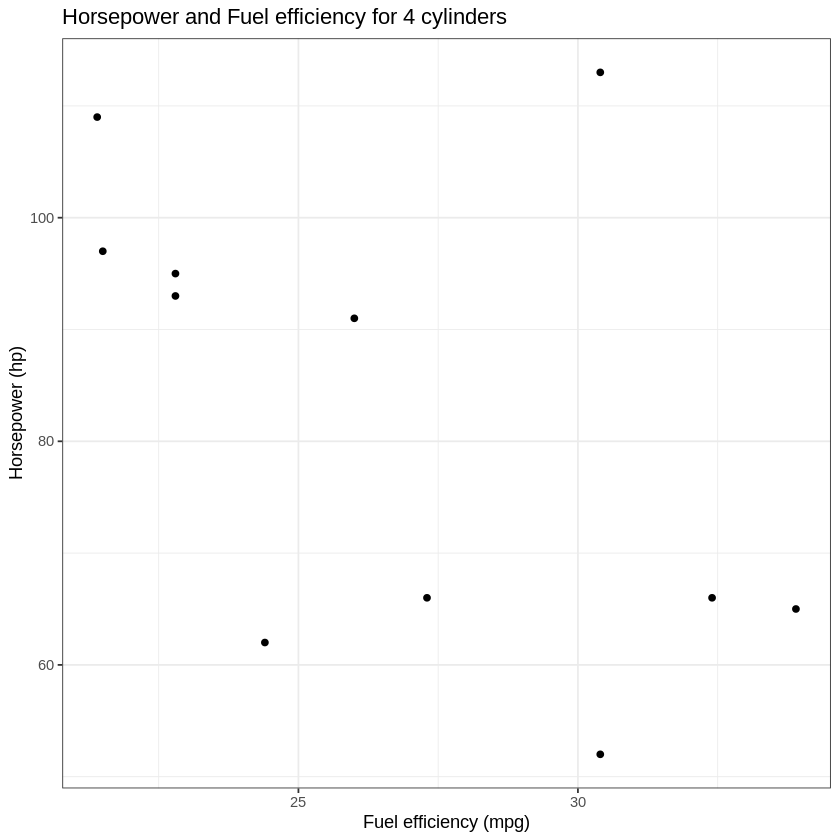

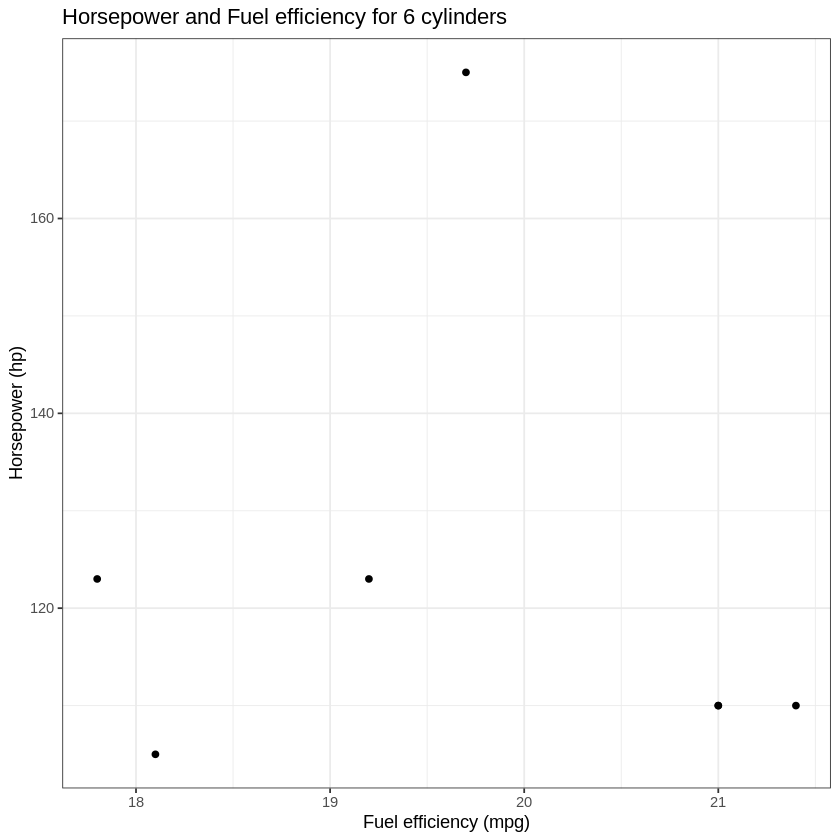

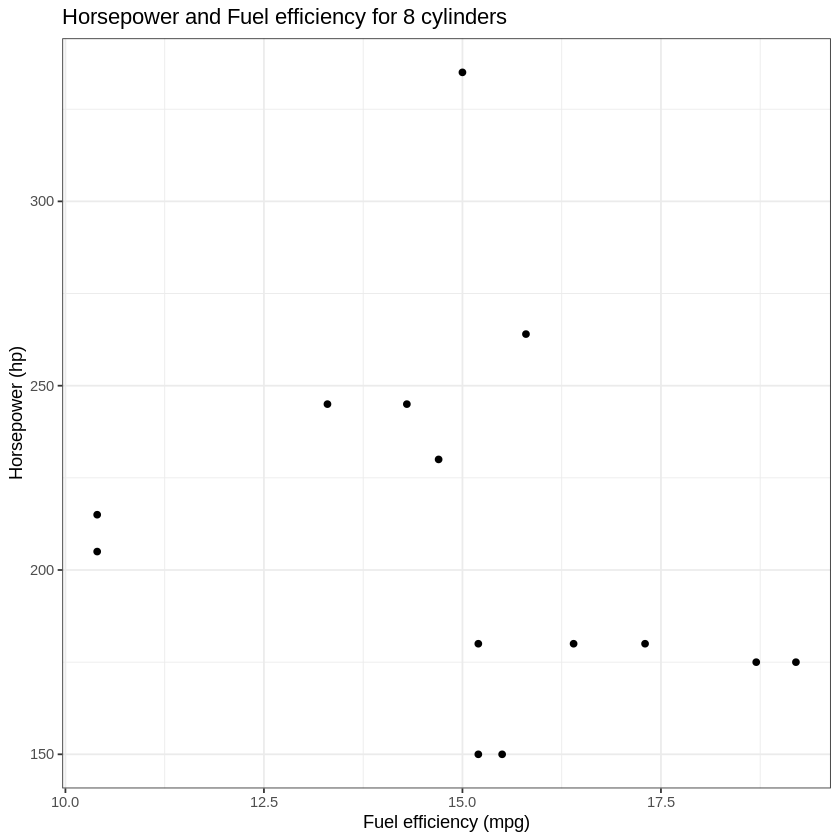

In [8]:
walk(answer7, print)

_Sidenote:_ `glue()` is a function that works like `paste()`, but `glue` increases readability (and allows creation of variables on the fly, etc.) Read more about `glue()` [here](https://www.tidyverse.org/blog/2017/10/glue-1.2.0/).

Example:

In [9]:
# define our variables
tues <- 3
thurs <- 4

# using the above predefined variables
paste("Tuesday is lecture", tues, "and Thursday is lecture", thurs)
glue("Tuesday is lecture {tues} and Thursday is lecture {thurs}.")

# create a variable on the fly
glue("Tuesday is lecture {tues <- 3} and Thursday is lecture {tues + 1}.")

[1] "Tuesday is lecture 3 and Thursday is lecture 4"

Tuesday is lecture 3 and Thursday is lecture 4.

Tuesday is lecture 3 and Thursday is lecture 4.

Now it's your turn. Use the appropriate `purrr` function to vectorize the for loop above. Store your answer into `answer7`, and then use `walk` to print your plot.

```r
answer7 <- FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN datasets::mtcars %>% 
    filter(cyl == FILL _THIS_IN[FILL_THIS_IN]) %>%
    ggplot() + 
    theme_bw() +
    geom_point(aes(x = mpg, y = hp) ) + 
    labs(x = 'Fuel efficiency (mpg)',
         y = 'Horsepower (hp)') + 
    ggtitle(glue(FILL_THIS_IN)))
walk(answer7, FILL_THIS_IN)
```

_Hint:_ Use an anonymous function. The `~` shorthand can be used as well. The third `FILL_THIS_IN` corresponds to an anonymous function.

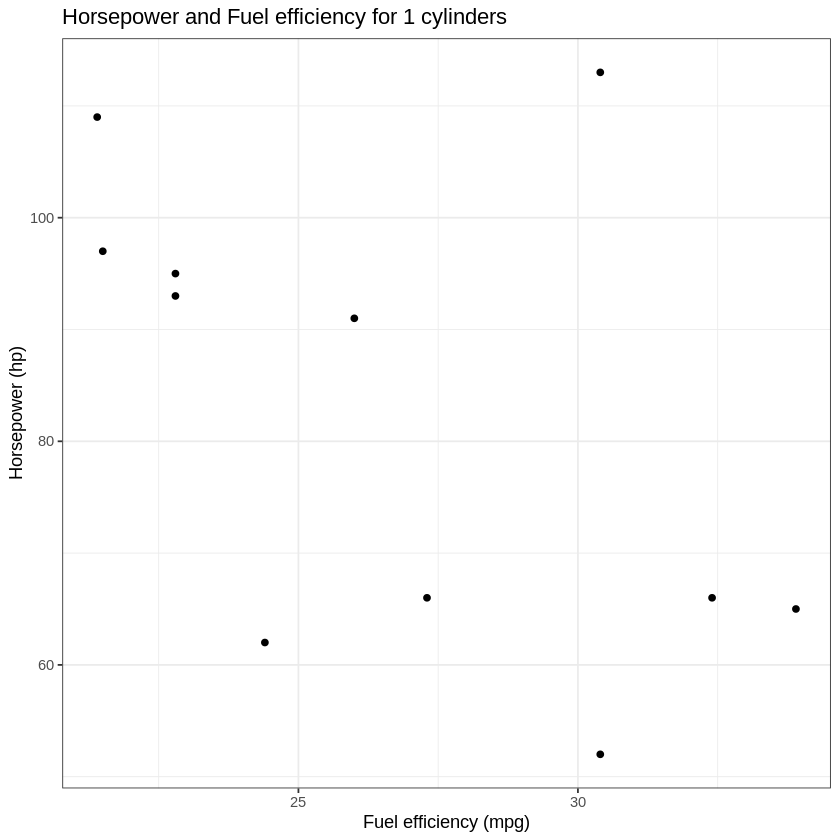

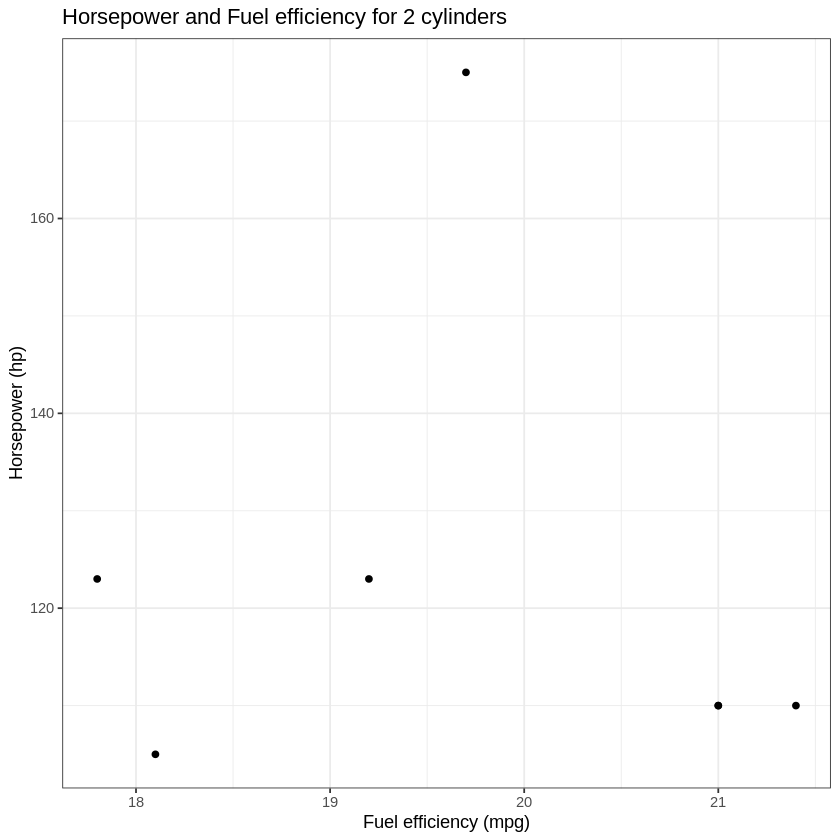

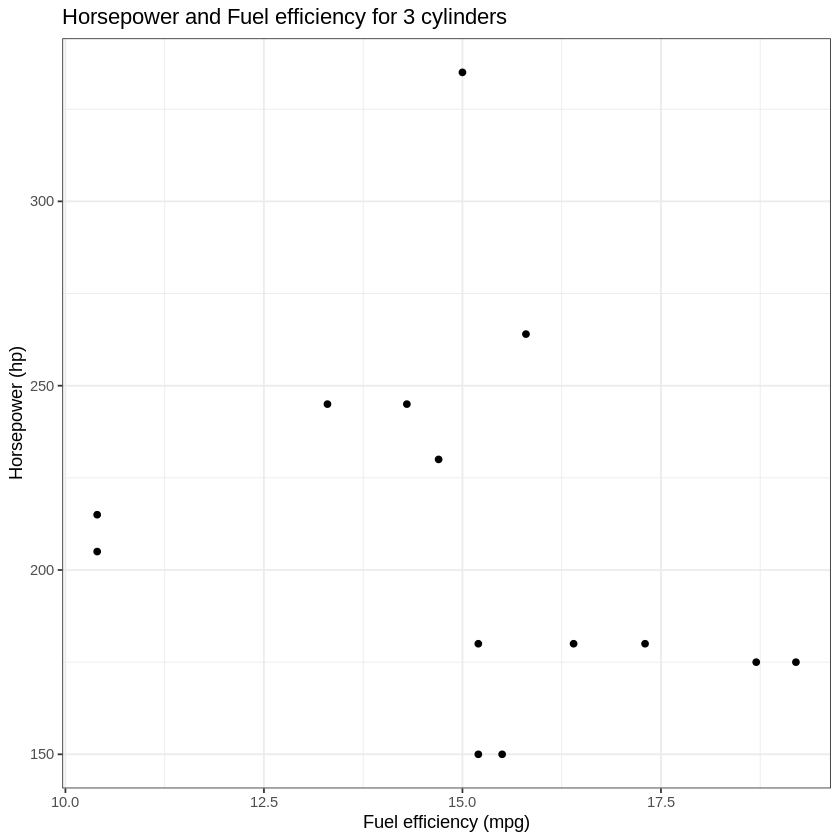

In [10]:
answer7 <- map(1:length(cylinders), ~ datasets::mtcars %>% 
    filter(cyl == cylinders[.x]) %>%
    ggplot() + 
    theme_bw() +
    geom_point(aes(x = mpg, y = hp) ) + 
    labs(x = 'Fuel efficiency (mpg)',
         y = 'Horsepower (hp)') + 
    ggtitle(glue("Horsepower and Fuel efficiency for {.x} cylinders")))
walk(answer7, print)

In [11]:
test_that('Question 7', {
    expect_known_hash(lapply(answer7, class), 'e4cc620580d23510a19096fa70dfdb54')
    expect_known_hash(lapply(answer7, function (a) dimnames(a$data)), '5cd534fa153cf3feacea3b30794c8b0a')
})
cat('Success!')

Success!

**QUESTION 8**: Below is sample code that computes the number of unique values in each column of `mtcars` as a named vector, using for-loops. Use the appropriate `purrr` function to vectorize this task.

In [12]:
answer8 <- vector("double", ncol(datasets::mtcars))
for (c in seq_along(datasets::mtcars)){
  answer8[[c]] <- length(unique(datasets::mtcars[[c]]))
}
names(answer8) <- names(datasets::mtcars)
answer8

mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
  25    3   27   22   22   29   30    2    2    3    6

Store your answer in `answer8`:

```r
(answer8 <- datasets::mtcars %>% 
    FILL_THIS_IN(FILL_THIS_IN) %>% 
    FILL_THIS_IN(FILL_THIS_IN))
```

In [30]:
(answer8 <- datasets::mtcars %>% 
     select_if(is.numeric) %>% 
    map(~ length(unique(.x))))

$mpg
[1] 25

$cyl
[1] 3

$disp
[1] 27

$hp
[1] 22

$drat
[1] 22

$wt
[1] 29

$qsec
[1] 30

$vs
[1] 2

$am
[1] 2

$gear
[1] 3

$carb
[1] 6

In [31]:
test_that('Question 8', {
    expect_known_hash(mode(answer8), '46606ee201b428a3fa6c8a0d3d9e671c')
    expect_known_hash(as.integer(answer8), '1981b33e1151073e1c227fe95218c6f5')
})
cat('Success!')

ERROR: Error: Test failed: 'Question 8'
* <text>:2: Value hashes to 086ebc4c59c08c43e75bae74f1e16897, not 46606ee201b428a3fa6c8a0d3d9e671c


**QUESTION 9**: Below is sample code that takes input from various columns in the `diamonds` dataset and outputs a string containing information from the input. Use the appropriate `purrr` function to vectorize this task.

In [ ]:
dmonds <- diamonds %>% 
  slice(1:4)

answer9 <- character()
for (d in 1:nrow(dmonds)){
  answer9[d] <- glue("Diamond #", d , 
                      " sold for $", dmonds$price[d],
                      " and was ", dmonds$carat[d], " carats")
}
answer9

Store your answer into `answer9`: 

```r
list_of_things <- list(FILL_THIS_IN, FILL_THIS_IN, FILL_THIS_IN)
(answer9 <- FILL_THIS_IN(list_of_things,
                   FILL_THIS_IN glue("Diamond #", FILL_THIS_IN,
                                     " sold for $", FILL_THIS_IN,
                                     " and was ", FILL_THIS_IN, " carats")))
```

_Hint_: Use an anonymous function using the `~` formula shorthand.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that('Question 9', {
    expect_known_hash(mode(answer9), 'af31d61b8795057ce1ce2e040685107c')
    expect_known_hash(enc2utf8(answer9), '9e2cb5c733e819bd84b9f75a6832c7ae')
})
cat('Success!')

**QUESTION 10**: Let's use `purrr` to make probability distributions. The Generalized Pareto Distribution is a three-parameter distribution, so if we wanted to make a bunch of these distributions, we'd need a `purrr` function to plug in the three parameters. To make the GPD distributions, we can use a function called `dst_gpd()`. Here are the parameters of our 5 GPD distributions:

In [32]:
(parameters <- tibble(loc   = c(105, 99, 120, 119, 111),
                      scale = c(12.2, 13.5, 18.5, 9.2, 15.5),
                      shape = c(0.4, 0.9, 0.5, 0.6, 0.4)))

loc,scale,shape
<dbl>,<dbl>,<dbl>
105,12.2,0.4
99,13.5,0.9
120,18.5,0.5
119,9.2,0.6
111,15.5,0.4


Store your answer in `answer10`:

```r
(answer10 <- FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN))
```

In [33]:
(answer10 <- map(parameters, dst_gpd))

ERROR: Error in .f(.x[[i]], ...): argument "scale" is missing, with no default


In [ ]:
test_that('Question 10', {
    expect_known_hash(mode(answer10), '086ebc4c59c08c43e75bae74f1e16897')
    expect_known_hash(sapply(answer10, class), 'ee7cb82281be52ed29f760d8f17b5792')
    expect_known_hash(sapply(answer10, names), '2bd1810a814c7c80e0e8d74f70b42dc7')
    expect_known_hash(round(unlist(lapply(answer10, `[[`, 'parameters'), use.names = FALSE), 3), '10cf852189f399f692919183ba3379f4')
})
cat('Success!')

**QUESTION 11**: The following graph displays the probability density function of the first GPD. Modify the code using `purrr` so that all 5 density functions are displayed. Store your answer in `answer11`.

In [ ]:
(answer11 <- tibble(x = c(50, 400)) %>%
  ggplot(aes(x)) +
  stat_function(fun = get_density(answer10[[1]]), alpha = 0.25) +
  theme_minimal() +
  labs(y = "Density"))

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that('Question 11', {
    expect_known_hash(class(answer11), 'f2396055c330843a8e2c8c2054acfb2d')
    expect_known_hash(sapply(answer11$layers, class), '212c3363c21284bec0f3cbbf4f002473')
    expect_known_hash(unlist(lapply(answer11$layers, function (l) class(l$geom))), 'd5d7a529255a566066df2b8e0051a240')
})
cat('Success!')

### Introducing `do.call()`

Let's make a mixture distribution of the above 5 GPD's using the function `distplyr::mix()`. The straightforward way to do this would be to do:

In [ ]:
distplyr::mix(answer10[[1]], answer10[[2]], answer10[[3]], answer10[[4]], answer10[[5]])

How do we do this without explicitly giving all 5 GPDs? We can use `do.call()`:

```r
do.call(what, args)
```

From the [documentation](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/do.call):

|Argument|Description|
|--------|-----------|
|`what`|either a function or a non-empty character string naming the function to be called|
|`args`|a _list_ of arguments to the function call


**QUESTION 12**: Use `do.call()` to call `distplyr::mix()` on the 5 GDP's. Store your answer in `answer12`.
```r
answer12 <- do.call(FILL_THIS_IN, FILL_THIS_IN)
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_that('Question 12', {
    expect_known_hash(class(answer12), 'deec76c2fe0b54d40912e147fb1aeaad')
    expect_known_hash(answer12$name, 'b9bd27c9624c17266d444af065f6e29c')
    expect_known_hash(unlist(lapply(answer12$components$distributions, class)), 'a442061b2621378ff95566da3e1eaa7c')
    expect_known_hash(unlist(lapply(answer12$components$distributions, `[[`, 'parameters'), use.names = FALSE), '10cf852189f399f692919183ba3379f4')
})
cat('Success!')

Now let's combine `purrr`, nesting, and linear modelling!

**QUESTION 13**: For each `gapminder` continent, fit a linear model of `lifeExp` from `log(gdpPercap)` and put this as a new column. Store your answer into `answer13`:

```r
(answer13 <- gapminder %>% 
  select(continent, gdpPercap, lifeExp) %>% 
  nest(data = c(FILL_THIS_IN, FILL_THIS_IN)) %>% 
  mutate(model = FILL_THIS_IN(data, ~ lm(FILL_THIS_IN ~ FILL_THIS_IN, data = FILL_THIS_IN))))
```

In [25]:
(answer13 <- gapminder %>% 
  select(continent, gdpPercap, lifeExp) %>% 
  nest(data = c(lifeExp, gdpPercap)) %>% 
  mutate(model = map(data, ~ lm(lifeExp ~ log(gdpPercap), data = .x))))

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [26]:
test_that('Question 13', {
    expect_known_hash(sapply(answer13$model, class), '2fe5bf6c6fb725f272c801e5f7560afe')
    expect_known_hash(round(unlist(lapply(answer13$model, coef)), 3), 'e536d3378586d3c54b920504b3238cde')
})
cat('Success!')

Success!

**QUESTION 14**: Using your model from Question 13, make predictions using `augment()` from the `broom` package, and then `unnest`. Store your answer in `answer14`:

```r
(answer14 <- answer13 %>% 
  transmute(continent, yhat = map(FILL_THIS_IN, FILL_THIS_IN)) %>% 
  unnest(FILL_THIS_IN))
```

In [28]:
(answer14 <- answer13 %>% 
  transmute(continent, yhat = map(model, augment)) %>% 
  unnest( continent))

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  yhat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [29]:
test_that('Question 14', {
    expect_known_hash(dimnames(answer14), '5aef05c5c23749a0d5880dd697b47234')
    expect_known_hash(round(with(answer14, .fitted[order(lifeExp)]), 3), 'f8db1a712fe6b69f7577c88882248dc5')
    expect_known_hash(round(with(answer14, .sigma[order(lifeExp)]), 3), '83e927e2f02fd18c293c3a1ddb7a0ed2')
})
cat('Success!')

ERROR: Error: Test failed: 'Question 14'
* <text>:2: Value hashes to 63f2bcf189c95e1cb2365d22b92c1973, not 5aef05c5c23749a0d5880dd697b47234
* <text>:3: object '.fitted' not found
[1mBacktrace:[22m
[90m 1. [39mtestthat::expect_known_hash(...)
[90m 5. [39mbase::with.default(answer14, .fitted[order(lifeExp)])
[90m 6. [39m[ base::eval(...) ][90m with 1 more call[39m


## Writing Tests

Let's try writing some tests for these `purrr` functions!

These questions are _not_ for marks, and do not have autograded tests.

**QUESTION 15:** Write an assertion for the following function, which computes the number of unique values in each column of `penguins` in a vectorized way. First, run the code cell below so that you can see what the output of the function looks like. 

In [75]:
unique <- map(penguins, unique) %>% 
  map_dbl(length)
unique

species            island    bill_length_mm     bill_depth_mm 
                3                 3               165                81 
flipper_length_mm       body_mass_g               sex              year 
               56                95                 3                 3

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

**QUESTION 16:** Write an assertion for the following function, which converts characters to factors. First, run the code cell below so that you can see what the output of the function looks like.

In [ ]:
factors <- penguins %>%
  map_if(is.character, as.factor) 
factors %>% str() # check output

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer